<h1> Linear Regression </h1>

<p>This notebook covers a Python-based solution for the first programming exercise of the machine learning class on Coursera. 
Please refer to the  Please refer to the [exercise text](exercises/ex1.pdf) for detailed descriptions and equations.", for detailed descriptions and equations.
In this exercise we'll implement simple linear regression using gradient descent and 
apply it to an example problem. We'll also extend our implementation to handle multiple 
variables and apply it to a slightly more difficult example.</p>


<h2> Linear regression with one variable </h2>

<p>In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.
You would like to use this data to help you select which city to expand to next.The file ex1data1.txt contains the dataset for our linear regression prob- lem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.</p>

<h3> Importing data </h3>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
path = os.getcwd() + '/data/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

In [25]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [26]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


<h3> Plotting the data </h3>

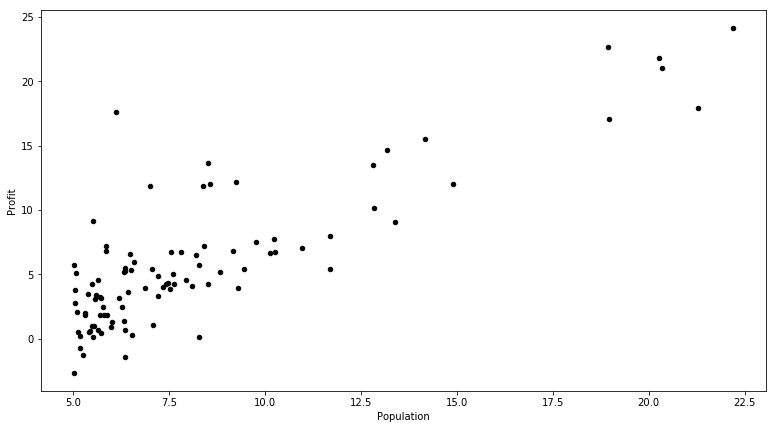

In [27]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(13,7),c='black')

<h3> Define Cost Function </h3>

In [28]:
def costFunction(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

The objective of linear regression is to minimize the cost function

\begin{equation}
 J(\theta_1,\theta_2) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^i)-y^i)^2 \tag{5}\\
\end{equation}

where the hypothesis hθ(x) is given by the linear model

\begin{equation}
 h_\theta(x)= \theta^T = \theta_0 + \theta_1x_1 
\end{equation}

In order to make this cost function work seamlessly with the pandas data frame we created above, we need to do some manipulating. First, we need to insert a column of 1s at the beginning of the data frame in order to make the matrix operations work correctly. Second, we need to separate our data into independent variables X and our dependent variable y.

In [29]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [30]:
data.insert(0, 'Ones', 1)

In [31]:
rows = data.shape[0]
cols = data.shape[1]
print(rows,cols)

97 3


In [32]:
X = data.iloc[:,0:cols-1] 
y = data.iloc[:,cols-1:cols]
print(X.head())
print(y.head())

   Ones  Population
0     1      6.1101
1     1      5.5277
2     1      8.5186
3     1      7.0032
4     1      5.8598
    Profit
0  17.5920
1   9.1302
2  13.6620
3  11.8540
4   6.8233


Finally, we're going to convert our data frames to numpy matrices and instantiate a parameter matrix.

In [33]:
X = np.matrix(X.values)
y = np.matrix(y.values)
print(X[0:5,:])

[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]]


In [34]:
theta = np.matrix(np.array([0,0]))
print(theta)

[[0 0]]


It's also helpful to remember when walking through the steps in your head that matrix multiplications look like (i x j) * (j x k) = (i x k), where i, j, and k are the shapes of the relative dimensions of the matrix.

In [35]:
X.shape, theta.T.shape, y.shape

((97, 2), (2, 1), (97, 1))

Now let's compute the cost for our initial solution (0 values for theta).

In [36]:
costFunction(X,y,theta)

32.072733877455676

<h3>Define Gradient Descent Function</h3>

Here's the function for gradient descent:

\begin{equation}
\theta_j := \theta_j * \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^i)-y^i)^2 (x_j^i)
\end{equation}

In [37]:
def gradientDescent(X, y, theta, alpha, iters):  
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = costFunction(X, y, theta)

    return theta, cost

Note that we've initialized a few new variables here. If you look closely at the gradient descent function, it has parameters called alpha and iters. <b>Alpha</b> is the learning rate - it's a factor in the update rule for the parameters that helps determine how quickly the algorithm will converge to the optimal solution. <b>Iters</b> is just the number of iterations. There is no hard and fast rule for how to initialize these parameters and typically some trial-and-error is involved.

In [38]:
alpha = 0.01  
iters = 1000

Perform gradient descent to "fit" the model parameters.

In [43]:
z, cost = gradientDescent(X, y, theta, alpha, iters)  
print("Theta is:",z)

Theta is: [[-3.24140214  1.1272942 ]]


We now have a parameter vector descibing what we believe is the optimal linear model for our data set. One quick way to evaluate just how good our regression model is might be to look at the total error of our new solution on the data set:

In [40]:
costFunction(X,y,z)

4.5159555030789118

<h3>Viewing The Results</h3>

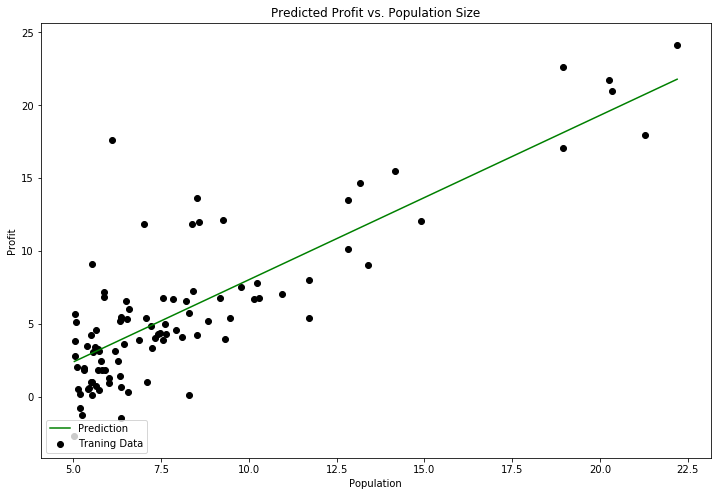

In [41]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)  
f = z[0, 0] + (z[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(x, f, 'g', label='Prediction')  
ax.scatter(data.Population, data.Profit, label='Traning Data',c='black')  
ax.legend(loc=3)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size')

Not bad! Our solution looks like and optimal linear model of the data set. Since the gradient decent function also outputs a vector with the cost at each training iteration, we can plot that as well.

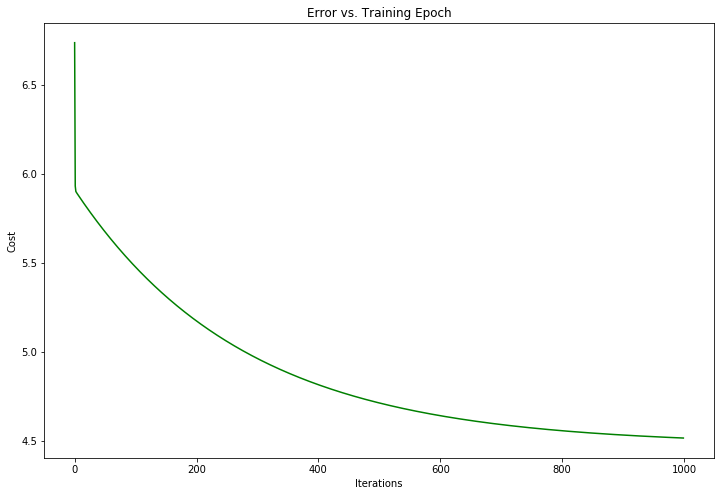

In [42]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'g')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

Notice that the cost always decreases - this is an example of what's called a convex optimization problem.